## Hallo saya Arsy Bilahil Tama
## Batch 07


1. link data set : https://www.kaggle.com/fedesoriano/heart-failure-prediction
2. deskripsi : mengeneai dataset ini berisikan mengenai penyakit gagal jantunng, adapun keterangan columns : <br>
   1. Age : age of the patient<br>
   2. Sex : sex of the patient [M: Male, F: Female]<br>
   3. ChestPainType : tipe nyeri dada  <br>
      <ul>
         <li>TA  : Angina Tipikal</li>
         <li>ATA : Angina Atipikal</li>
         <li>NAP : Non-Anginal</li>
         <li>ASY : tanpa gejala</li>
      </ul>
   5. RestingBP : resting blood pressure [mm Hg]<br>
   6. FastingBS : Fasting gula darah<br>
      <ul>
         <li>Nilai 0 : FastingBS >120 mg/dl</li>
         <li>Nilai 1 : FastingBS < 120 mg/dl</li>
      </ul>
   7. RestingECG : Resting electrocardiogram result<br>
      <ul>
         <li>Normal : Normal</li>
         <li>ST : memiliki kelainan gelombang ST-T (inversi gelombang T dan/atau elevasi atau depresi ST > 0,05 mV)</li>
         <li>LVH : menunjukkan kemungkinan atau pasti hipertrofi ventrikel kiri menurut kriteria Estes]</li>
      </ul>
   8. MaxHR : detak jantung maksimum tercapai [Nilai numerik antara 60 dan 202]<br>
   9.  ExerceseAngina : angina yang diinduksi oleh olahraga <br>
      <ul>
         <li>Y : Ya</li>
         <li>N : Tidak</li>
      </ul>
   10. Oldpeak: oldpeak : ST [Nilai numerik diukur dalam depresi]<br>
   11. ST_Slope: kemiringan puncak latihan segmen ST <br>
      <ul>
         <li>UP : Upsloping</li>
         <li>Flat : flat</li>
         <li>Down : Down sloping</li>
      </ul>
   12. HeartDisease : kelas keluaran 
      <ul>
         <li>1 : Penyakit Jantung</li>
         <li>0 : Normal</li>
      </ul>


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv('heart.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


notes :
1. no missing value
2. and there are 14 columns and 303 rows

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.shape

(918, 12)

In [7]:
#chek target
targate = df.groupby('HeartDisease').size()
targete = pd.DataFrame(targate).reset_index()

targete['percent'] = round((targete[0]/df['HeartDisease'].count()) * 100)

In [8]:
targete.rename(columns = {0 : 'jumlah'})

,HeartDisease,jumlah,percent
0,0,410,45.0
1,1,508,55.0


In [9]:
fig = px.bar(targete, x='HeartDisease', y = 0,
             hover_data=['percent'],
             title= 'jumlah label target',
             labels={'index':'HeartDisease'})

fig.show()

In [10]:
trgt_0 = df[df['HeartDisease']==0]
trgt_1 = df[df['HeartDisease']==1]

trgt_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [28]:
trgt_0.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [11]:
def group_df(df_in, col):
    return df_in.groupby(col).size().to_frame('count').reset_index()

In [12]:
#age
age_df = group_df(df, "Age")
age_0 = group_df(trgt_0, 'Age')
age_1 = group_df(trgt_1, 'Age')

In [13]:
def bar(var1, var2, title1, title2):
    fig = make_subplots(rows = 2, cols = 1, 
                        subplot_titles=(title1, title2),
                        shared_yaxes=True)

    fig.add_trace(go.Bar(x=list(var1['Age']), y=list(var1['count']),
                    marker=dict(color=list(var1['count']))),
              1, 1)

    fig.add_trace(go.Bar(x=list(var2['Age']), y=list(var2['count']),
                    marker=dict(color=list(var2['count']))),
              2, 1)
    
    fig.update_layout(legend_title_text = "Label")
    
    fig.show()

In [14]:
bar(age_0, age_1, 'jumlah umur pada label 0', 'jumlah umur pada label 1')

In [15]:
#jenis kelamin

sex_0 = group_df(trgt_0, "Sex")
sex_1 = group_df(trgt_1, 'Sex')

In [16]:
fig = make_subplots(
    rows = 1, cols = 2,
    specs=[[{'type' : 'pie'}, {'type' : 'pie'}]],
    
    subplot_titles=('Sex target 0', 'Sex target 1')
)

fig.add_trace(go.Pie(labels = sex_0['Sex'], values=sex_0['count']),
              1,1)

fig.add_trace(go.Pie(labels = sex_1['Sex'], values=sex_1['count']),
              1,2)

fig.update_layout(height = 700,showlegend = False, title_text =  "jumlah kelamin anatar target 0 dengan 1")
fig.show()

In [17]:
# ChestPainType
ChestPainType_0 = group_df(trgt_0, 'ChestPainType')
ChestPainType_1 = group_df(trgt_1, 'ChestPainType')

In [18]:
fig = make_subplots(
    rows = 1, cols = 2,
    specs=[[{'type' : 'pie'}, {'type' : 'pie'}]],
    
    subplot_titles=('ChestPainType target 0', 'ChestPainType target 1')
)

fig.add_trace(go.Pie(labels = ChestPainType_0['ChestPainType'], values=ChestPainType_0['count']),
              1,1)

fig.add_trace(go.Pie(labels = ChestPainType_1['ChestPainType'], values=ChestPainType_1['count']),
              1,2)

fig.update_layout(height = 700,showlegend = False, title_text =  "jumlah ChestPainType anatar target 0 dengan 1")
fig.show()

In [19]:
px.violin(df, y='RestingBP', x='HeartDisease', color='Sex', box=True, points='all')

note: it can be seen in HeardDisease 0 Male and Female that it is almost similar to the Resting variation, and HaertDisease 1 has more variants of RstingBP, there are outliers in RestingBP Male

In [20]:
px.box(df, x='Cholesterol', y='HeartDisease', color='Sex', orientation='h')

note : 
1. HeartDisease :
   <ul>
   <li>untuk Female : terdapat oulier pada bagian bawah</li>
   <li>untuk Male : tidak terdapat outlier</li>
   </ul>
   <br>
2. HeartDisease 0:
   <ul>
   <li>untuk Female : terdapat oulier pada bagian atas dan bawah </li>
   <li>untuk Male : terapat outier pada bagian atas dan bawah </li>
   </ul>
   


In [21]:
px.box(df, x='Cholesterol', y='HeartDisease', color='ChestPainType', orientation='h')

note : 
1. HeartDisease :
    <ul>
    <li>TA : tidak terdapat outlier</li>
    <li>ASY : tidak terdapat outlier</li>
    <li>NAP : tidak terdapat outlier</li>
    <li>ATA : terdapat outlier pada atas dan bawah batasan</li>
    </ul>
    <br>
2. HeartDisease 0:
    <ul>
    <li>TA : tidak terdapat outlier</li>
    <li>ASY : terdapat outlier pada atas dan bawah batasan</li>
    <li>NAP : terdapat outlier pada atas dan bawah batasan</li>
    <li>ATA : terdapat outlier pada atas dan bawah batasan</li>
    </ul>
   


In [22]:
px.scatter(df, x='RestingBP', y='Cholesterol', color='HeartDisease', marginal_y='violin', marginal_x='violin')

note : 
1. dapat dilihat untuk barian horizontal tidak separah penumpukan data yang terdapat pada vertikal violin
2. pada plot tersebut dapat dilihat lumayan banyak pada sumbu y yang memiliki nilai cholestrol 0 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
num = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cateogic =  ['Sex', 'ChastPaintType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

<Figure size 720x576 with 0 Axes>

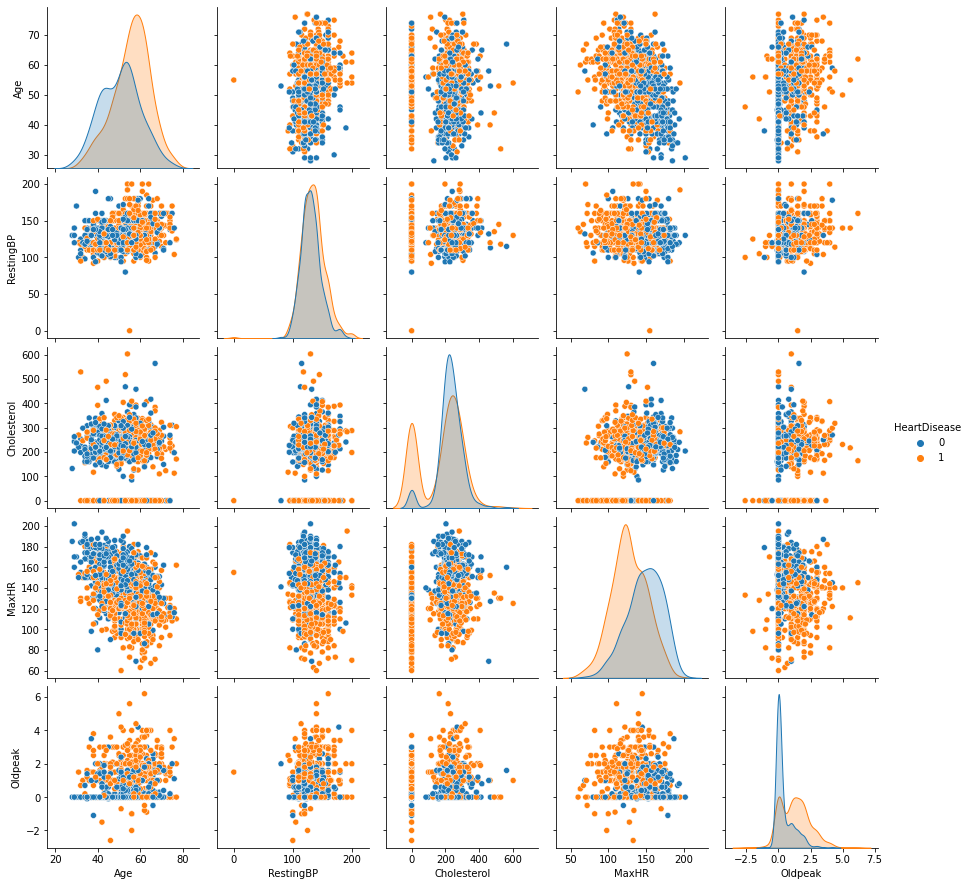

In [25]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease' ]], kind='scatter', hue='HeartDisease')
plt.show()


you can see from the plot above there is no linear relationship

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

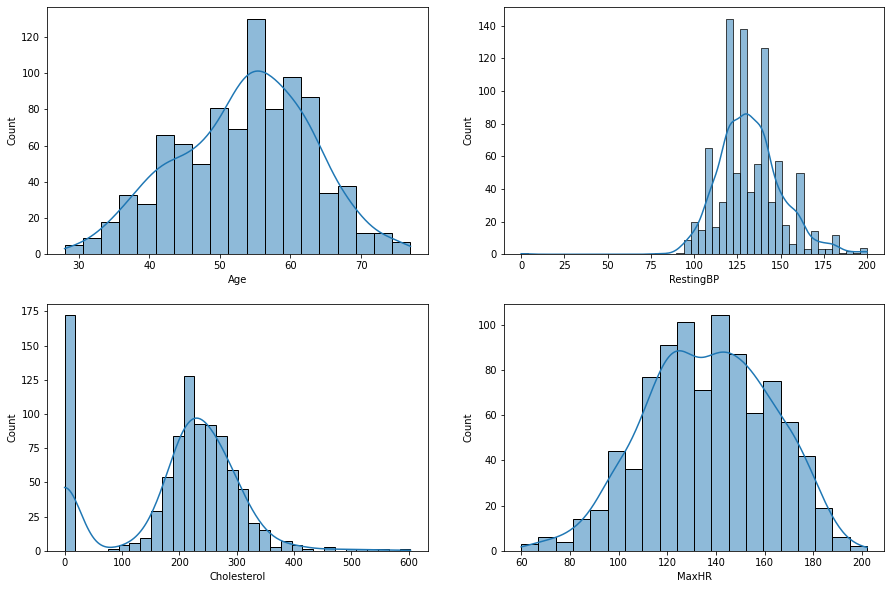

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(ax = axes[0,0], data=df, x='Age', kde=True)
sns.histplot(ax = axes[0,1], data=df, x='RestingBP', kde=True)
sns.histplot(ax = axes[1,0], data=df, x='Cholesterol', kde=True)
sns.histplot(ax = axes[1,1], data=df, x='MaxHR', kde=True)

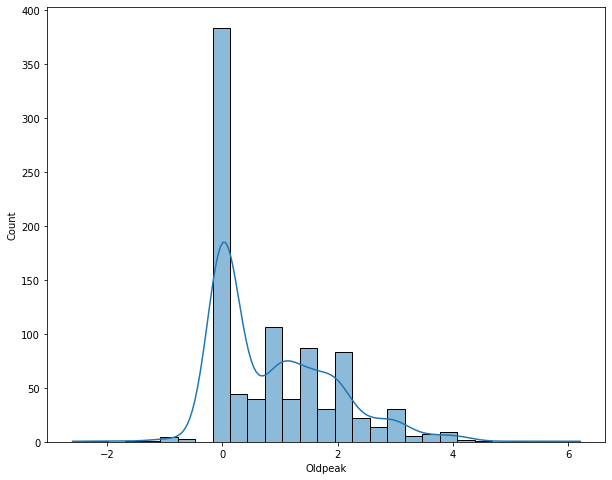

In [27]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df, x='Oldpeak', kde=True)
plt.show()

it can be seen that none has a normal distribution